### StarAgile Assignment - Regression Analysis - Level - 1
### Assignment Submitted by VINAY M on 04-09-2023

#### Problem Statement : Housing Price Prediction

- Apply various Regression Models for the House Price Prediction which will predict the price of the houses in future depending on the parameters.

- Dataset Link : https://drive.google.com/drive/folders/1gl9bNbxbxccKXLxx5CEtps9IB9wVLMZc?usp=share_link


#### What Kind Of Approach You Could Follow for your Problem Statements :

- Reading the Data, Understanding the Data, Exploratory Data Analysis, Data Visualization, Splitting the Data, Training and Testing, Modeling, Accuracy

- Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.

In [1]:
# House Price Prediction
# Vinay M

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
#checking number of zeros

In [8]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
for col in df.columns:
    count = (df[col]==0).sum()
    print(f'{col} contains: {count} zeros')

id contains: 0 zeros
date contains: 0 zeros
price contains: 0 zeros
bedrooms contains: 13 zeros
bathrooms contains: 10 zeros
sqft_living contains: 0 zeros
sqft_lot contains: 0 zeros
floors contains: 0 zeros
waterfront contains: 21450 zeros
view contains: 19489 zeros
condition contains: 0 zeros
grade contains: 0 zeros
sqft_above contains: 0 zeros
sqft_basement contains: 13126 zeros
yr_built contains: 0 zeros
yr_renovated contains: 20699 zeros
zipcode contains: 0 zeros
lat contains: 0 zeros
long contains: 0 zeros
sqft_living15 contains: 0 zeros
sqft_lot15 contains: 0 zeros


In [10]:
# Eliminating Unneccesary Columns

In [11]:
drop_columns = ['date','id', 'zipcode', 'lat', 'long','yr_built', 'yr_renovated','sqft_basement','view','waterfront', 'sqft_basement']

In [12]:
df = df.drop(columns=drop_columns)

In [13]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,1410,1287


In [14]:
for col in df.columns:
    count = (df[col]==0).sum()
    print(f'{col} contains: {count} zeros')

price contains: 0 zeros
bedrooms contains: 13 zeros
bathrooms contains: 10 zeros
sqft_living contains: 0 zeros
sqft_lot contains: 0 zeros
floors contains: 0 zeros
condition contains: 0 zeros
grade contains: 0 zeros
sqft_above contains: 0 zeros
sqft_living15 contains: 0 zeros
sqft_lot15 contains: 0 zeros


In [15]:
bedroom_median = df['bedrooms'].median()
bathrooms_median = df['bathrooms'].median()
print(bedroom_median)
print(bathrooms_median)

3.0
2.25


In [16]:
def replace_zero_bedroom(value):
    if value ==0:
        return bedroom_median
    else:
        return value

In [17]:
def replace_zero_bathroom(value):
    if value ==0:
        return bathrooms_median
    else:
        return value

In [18]:
df['bedrooms'] = df['bedrooms'].apply(replace_zero_bedroom)
df['bathrooms'] = df['bathrooms'].apply(replace_zero_bathroom)
for col in df.columns:
    count = (df[col]==0).sum()
    print(f'{col} contains: {count} zeros')

price contains: 0 zeros
bedrooms contains: 0 zeros
bathrooms contains: 0 zeros
sqft_living contains: 0 zeros
sqft_lot contains: 0 zeros
floors contains: 0 zeros
condition contains: 0 zeros
grade contains: 0 zeros
sqft_above contains: 0 zeros
sqft_living15 contains: 0 zeros
sqft_lot15 contains: 0 zeros


In [19]:
df.shape

(21613, 11)

In [20]:
df.dropna(inplace = True)  # Drops rows with missing values
df.dropna(axis=1, inplace = True)  # Drops columns with missing values

In [21]:
#After Dropping Nulls
df.shape

(21613, 11)

<Axes: >

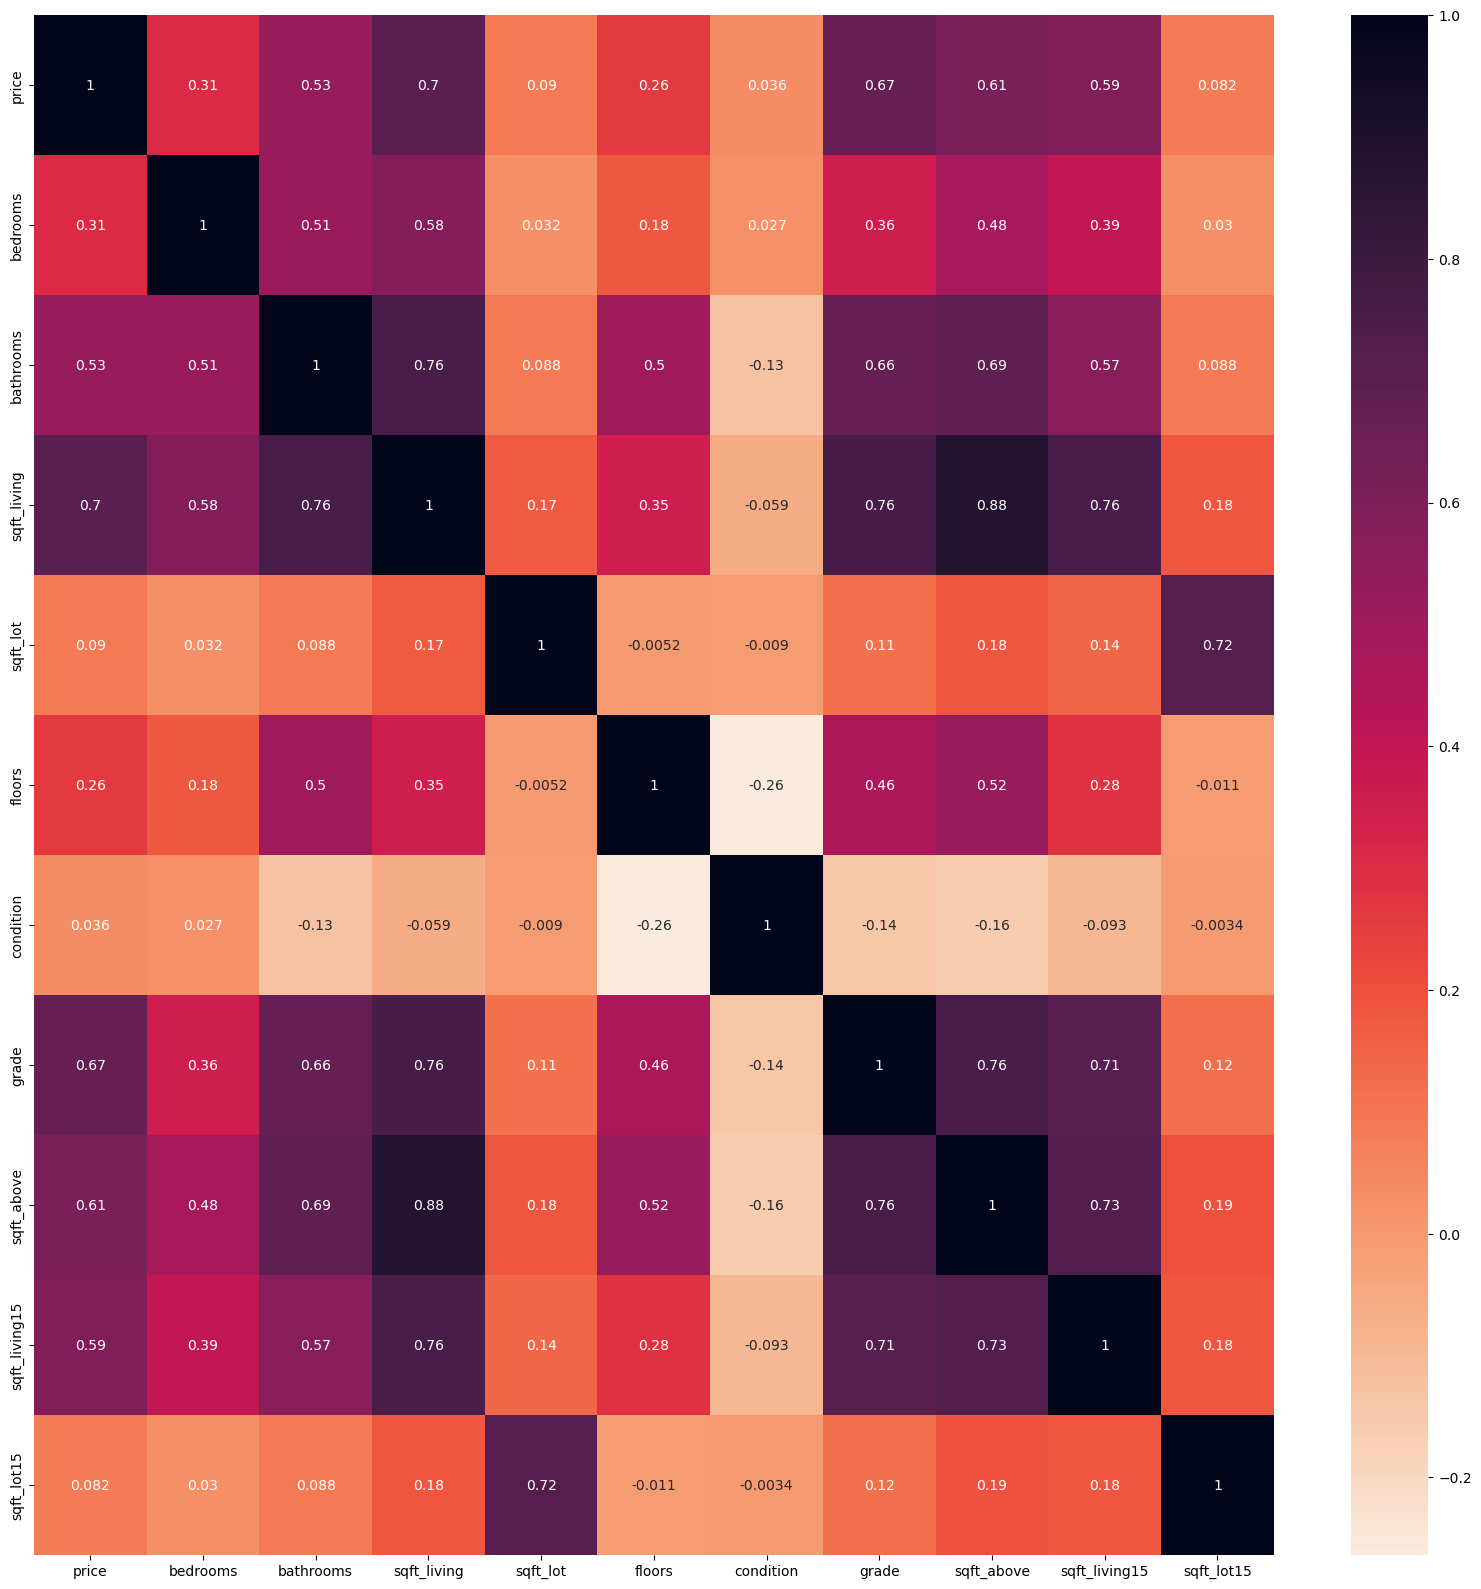

In [22]:
# Correlation Matrix and HeatMap visualization for Checking the relationship
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="rocket_r")

In [ ]:
# Selecting the Best Feature for Given Dataset

In [ ]:
# High corelation variables are

# sqft_living
# grade 
# sqft_above
# sqft_living15

In [23]:
# Creating a subset of columns
interested_cols = ['price','sqft_living','grade','sqft_above','sqft_living15']

In [24]:
dfNew = df[interested_cols]

In [25]:
dfNew

,price,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1180,7,1180,1340
1,538000.0,2570,7,2170,1690
2,180000.0,770,6,770,2720
3,604000.0,1960,7,1050,1360
4,510000.0,1680,8,1680,1800
...,...,...,...,...,...
21608,360000.0,1530,8,1530,1530
21609,400000.0,2310,8,2310,1830
21610,402101.0,1020,7,1020,1020
21611,400000.0,1600,8,1600,1410


In [26]:
dfNew.describe()

,price,sqft_living,grade,sqft_above,sqft_living15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,7.656873,1788.390691,1986.552492
std,3.671272e+05,918.440897,1.175459,828.090978,685.391304
min,7.500000e+04,290.000000,1.000000,290.000000,399.000000
25%,3.219500e+05,1427.000000,7.000000,1190.000000,1490.000000
50%,4.500000e+05,1910.000000,7.000000,1560.000000,1840.000000
75%,6.450000e+05,2550.000000,8.000000,2210.000000,2360.000000
max,7.700000e+06,13540.000000,13.000000,9410.000000,6210.000000


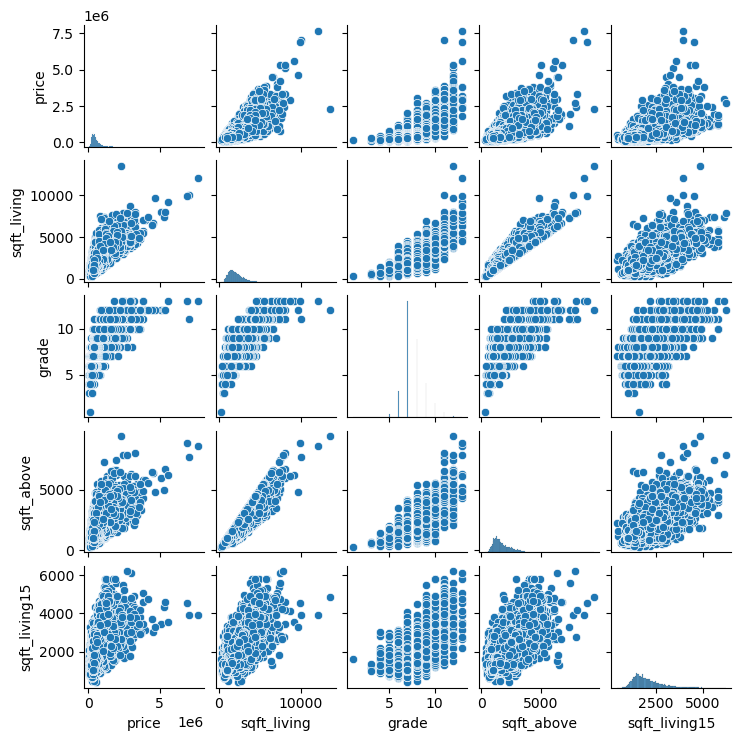

In [27]:
sns.pairplot(dfNew, height=1.5);
plt.show()

In [28]:
# Applying Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
columns_to_standardize = ['sqft_living', 'grade','sqft_above','sqft_living15']

In [31]:
scaler = StandardScaler()

In [33]:
dfNew[columns_to_standardize] = scaler.fit_transform(dfNew[columns_to_standardize])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8196\1996352933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew[columns_to_standardize] = scaler.fit_transform(dfNew[columns_to_standardize])


In [34]:
dfNew

,price,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,-0.979835,-0.558836,-0.734708,-0.943355
1,538000.0,0.533634,-0.558836,0.460841,-0.432686
2,180000.0,-1.426254,-1.409587,-1.229834,1.070140
3,604000.0,-0.130550,-0.558836,-0.891699,-0.914174
4,510000.0,-0.435422,0.291916,-0.130895,-0.272190
...,...,...,...,...,...
21608,360000.0,-0.598746,0.291916,-0.312039,-0.666135
21609,400000.0,0.250539,0.291916,0.629908,-0.228419
21610,402101.0,-1.154047,-0.558836,-0.927928,-1.410253
21611,400000.0,-0.522528,0.291916,-0.227505,-0.841221


In [36]:
# Checking Normal Distribution

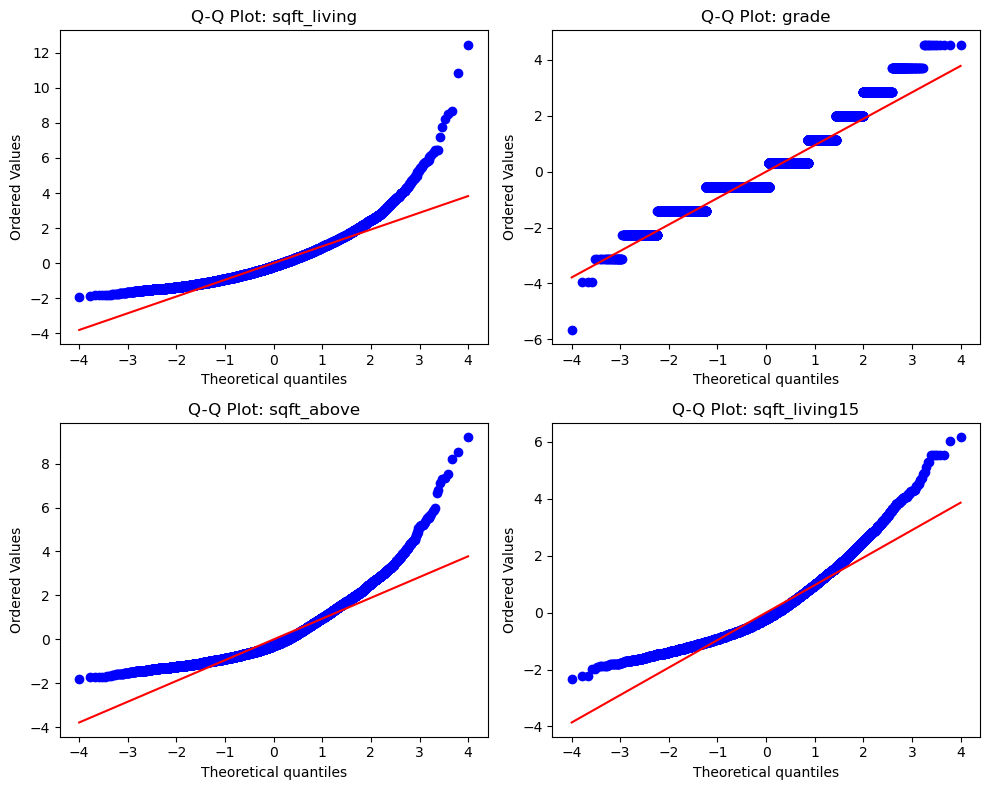

In [39]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# top-left subplot
stats.probplot(dfNew['sqft_living'], dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('Q-Q Plot: sqft_living')

# top-right subplot
stats.probplot(dfNew['grade'], dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot: grade')

# bottom-left subplot
stats.probplot(dfNew['sqft_above'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: sqft_above')

# bottom-right subplot
stats.probplot(dfNew['sqft_living15'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: sqft_living15')

# Add spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [40]:
dfNew

,price,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,-0.979835,-0.558836,-0.734708,-0.943355
1,538000.0,0.533634,-0.558836,0.460841,-0.432686
2,180000.0,-1.426254,-1.409587,-1.229834,1.070140
3,604000.0,-0.130550,-0.558836,-0.891699,-0.914174
4,510000.0,-0.435422,0.291916,-0.130895,-0.272190
...,...,...,...,...,...
21608,360000.0,-0.598746,0.291916,-0.312039,-0.666135
21609,400000.0,0.250539,0.291916,0.629908,-0.228419
21610,402101.0,-1.154047,-0.558836,-0.927928,-1.410253
21611,400000.0,-0.522528,0.291916,-0.227505,-0.841221


In [41]:
# Splitting Data for Train and Testing

In [42]:
from sklearn.model_selection import train_test_split

In [45]:
X = dfNew.iloc[:, 1:]
X

,sqft_living,grade,sqft_above,sqft_living15
0,-0.979835,-0.558836,-0.734708,-0.943355
1,0.533634,-0.558836,0.460841,-0.432686
2,-1.426254,-1.409587,-1.229834,1.070140
3,-0.130550,-0.558836,-0.891699,-0.914174
4,-0.435422,0.291916,-0.130895,-0.272190
...,...,...,...,...
21608,-0.598746,0.291916,-0.312039,-0.666135
21609,0.250539,0.291916,0.629908,-0.228419
21610,-1.154047,-0.558836,-0.927928,-1.410253
21611,-0.522528,0.291916,-0.227505,-0.841221


In [46]:
y = df.iloc[:, 0]
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [47]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_test)

In [77]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 68865225844.17
R-squared: 0.54


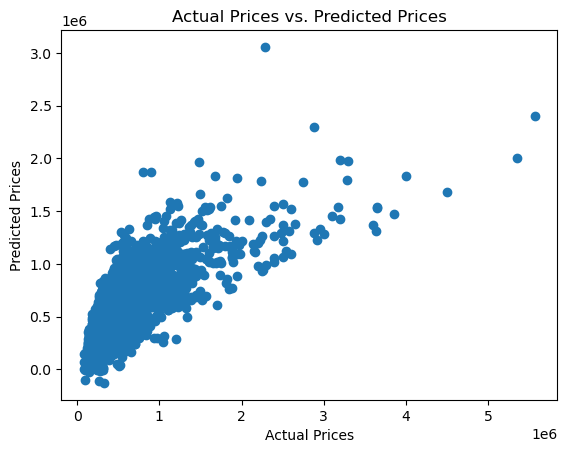

In [78]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [79]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

        Variable    Coefficient
0    sqft_living  210111.551683
1          grade  121538.627884
2     sqft_above  -68366.151053
3  sqft_living15   17903.013845


In [ ]:
# Saving a model

In [91]:
import joblib
joblib.dump(model, 'linear_model.pkl')

['linear_model.pkl']

In [80]:
# L1 and L2 Regression

In [81]:
from sklearn.linear_model import Lasso, Ridge

In [83]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge (L2) Regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate models
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Lasso): {mse_lasso:.2f}')
print(f'R-squared: {r2_lasso:.2f}')
print(f'Mean Squared Error (Ridge): {mse_ridge:.2f}')
print(f'R-squared: {r2_ridge:.2f}')

Mean Squared Error (Lasso): 68865227808.65
R-squared: 0.54
Mean Squared Error (Ridge): 68865226396.45
R-squared: 0.54


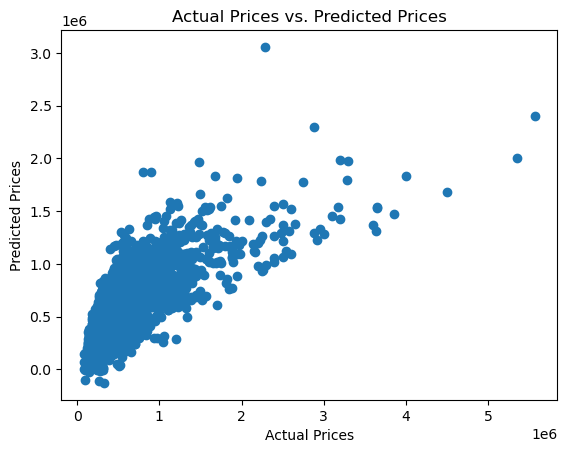

In [84]:
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

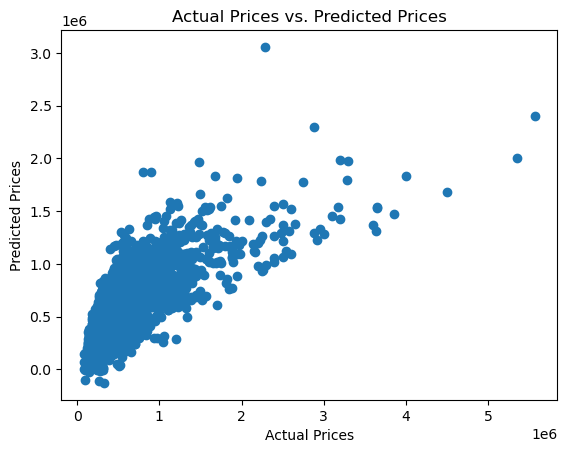

In [85]:
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [ ]:
# Saving Model

In [92]:
joblib.dump(lasso_model, 'lasso_model.pkl')
joblib.dump(ridge_model, 'ridge_model.pkl')

['ridge_model.pkl']

In [86]:
# Elastic Net Regression

In [87]:
from sklearn.linear_model import ElasticNet

In [88]:
# Create an Elastic Net regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit the model to the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 74616783951.18
R-squared: 0.51


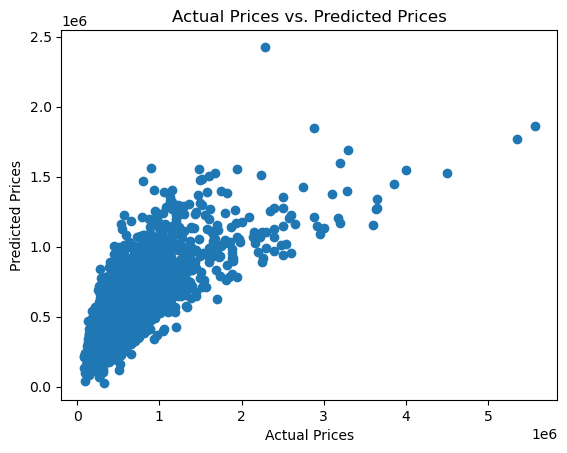

In [89]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

In [93]:
# Saving Model

In [94]:
joblib.dump(elastic_net, 'elastic_net.pkl')

['elastic_net.pkl']

In [95]:
# Making Predictions

In [102]:
import joblib
import warnings
warnings.filterwarnings("ignore")

# Load the saved model
linearmodel = joblib.load('linear_model.pkl')
lassomodel = joblib.load('lasso_model.pkl')
ridgemodel = joblib.load('ridge_model.pkl')
elasticnet = joblib.load('elastic_net.pkl')

# New data for prediction
# sqft_living
# grade
# sqft_above
# sqft_living15



#price	sqft_living	grade	sqft_above	sqft_living15
#221900.0	-0.979835	-0.558836	-0.734708	-0.943355
#538000.0	0.533634	-0.558836	0.460841	-0.432686
#180000.0	-1.426254	-1.409587	-1.229834	1.070140

#input standardised value

new_data = [[0.533634, -0.558836, 0.460841, -0.432686]]
ActualPrice = 538000.0

# Make predictions using the loaded model
linearPredicted = linearmodel.predict(new_data)
lassoPredicted = lassomodel.predict(new_data)
ridgePredicted = ridgemodel.predict(new_data)
elasticnetPredicted = elasticnet.predict(new_data)


print("Predictions by Linear Regression:", linearPredicted)
print("Predictions Error by Linear Regression:", linearPredicted-ActualPrice)
print()
print("Predictions by Lasso Regression:", lassoPredicted)
print("Predictions Error by Lasso Regression:", lassoPredicted-ActualPrice)
print()
print("Predictions by Ridge Regression:", ridgePredicted)
print("Predictions Error by Ridge Regression:", ridgePredicted-ActualPrice)
print()
print("Predictions by Elastic net Regression:", elasticnetPredicted)
print("Predictions Error by Elastic net Regression:", elasticnetPredicted-ActualPrice)

Predictions by Linear Regression: [544299.78184601]
Predictions Error by Linear Regression: [6299.78184601]

Predictions by Lasso Regression: [544300.1726076]
Predictions Error by Lasso Regression: [6300.1726076]

Predictions by Ridge Regression: [544299.11164541]
Predictions Error by Ridge Regression: [6299.11164541]

Predictions by Elastic net Regression: [539018.94263829]
Predictions Error by Elastic net Regression: [1018.94263829]
